# **Chapter 1: Overview**

## **1.1. Problem Statement**

In the context of a rapidly developing economy, particularly in the unsecured lending market, credit risk assessment has become a critical factor for lending institutions. One of the core indicators reflecting both the effectiveness and the risk level of lending activities is the loan repayment status, which indicates whether a loan has defaulted. Accurate prediction of default risk not only enables financial institutions to improve risk management, but also contributes to more efficient credit allocation, prevents the spread of non-performing loans, and enhances the overall quality of loan portfolios.

## **1.2. Research Objectives**

### **1.2.1. General Objective**

To analyze the factors affecting borrowers’ default risk based on personal credit data, and to develop a default probability prediction model using logistic regression.

### **1.2.2.  Specific Objectives**

- Examine the relationships among variables in the dataset.

- Analyze the degree (strong/weak, positive/negative) of influence on default risk.

- Estimate the probability of default and analyze it through the logistic regression method.

## **1.3. Research Methodology**

The study employs logistic regression to analyze the dataset with the objective of determining the probability of default based on influencing factors. In addition, it applies descriptive statistics, statistical significance testing, and evaluates the magnitude of the impact of each factor on default risk.

# **Chapter 2: Dataset Overview**

## **2.1. General Introduction**

The Credit Risk Dataset contains information on 32,581 loan applicants, including demographic characteristics, financial status, credit history, and especially the loan outcome (on-time repayment or default).

## **2.2. Data Description**

Detailed description of dataset features:
- **person_age**: Age of the borrower.
- **person_income**: Annual income.
- **person_home_ownership**: Borrower’s home ownership status:
 - **RENT**: Currently renting.
 - **OWN**: Owns a home outright, without a mortgage.
 - **MORTGAGE**: Owns a home with a mortgage.
- **person_emp_length**: Number of years of employment (work experience).
- **loan_intent**: Purpose of the loan:
 - **PERSONAL**: Personal use.
 - **EDUCATION**: Education expenses.
 - **MEDICAL**: Medical or healthcare-related expenses.
 - **VENTURE**: Investment in a business project.
 - **HOMEIMPROVEMENT**: Home renovation or improvement.
 - **DEBTCONSOLIDATION**: Consolidation of multiple debts into a single loan.
- **loan_grade**: Loan grade based on assessed risk:
 - **A**: Highest credit quality, lowest risk..
 - **B**: Above-average credit quality, relatively low risk.
 - **C**: Average credit quality, moderate risk.
 - **D**: Below-average credit quality, higher risk.
 - **E**: Low credit quality, very high risk.
 - **F**: Very low credit quality, extremely high risk.
 - **G**: Lowest credit quality, highest risk.
- **loan_amnt**: Loan amount requested.
- **loan_int_rate**: Loan interest rate.
- **loan_status**: Indicates whether the loan defaulted: '1' = default, '0' = no default.
- **loan_percent_income**: Ratio of loan amount to borrower’s income.
- **cb_person_default_on_file**: Indicates if the borrower has a history of default:
 - **Y**: Has a history of default.
 - **N**: No history of default.
- **cb_person_cred_hist_length**: Length of borrower’s credit history (in years).

## **2.3. Data Cleaning and Preprocessing**

### **2.3.1. Installing Libraries and Reading Data**

In [28]:
!pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Installing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# Reading Data
data = pd.read_csv("D:\My Data\credit_risk_dataset.csv")
# Display Data
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### **2.3.2. Data Cleaning and Preprocessing**

In [ ]:
# Dataset Structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


The dataset variables are standardized in the following formats:
- int64: integer values (5 variables)
- float64: floating-point values (3 variables)
- object: string/text values (4 variables)

In [ ]:
# Descriptive statistics
data.describe() # check the dataset

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Based on the descriptive statistics, missing values are observed in variables person_emp_length and loan_int_rate, while outliers are detected in person_age and person_emp_length. Furthermore, the dataset is examined for potential duplicate records.

In [ ]:
# Remove outlier values in the 'person_age' variable.
for x in data.index:
  if data.loc[x, 'person_age'] >= 100: # Exclude records where age is greater than or equal to 100 years.
    data.drop(x, inplace = True)

In [ ]:
# Outliers in the 'person_emp_length' variable are identified and removed.
for x in data.index:
  if data.loc[x, 'person_emp_length'] >= 50: # Records with work experience of 50 years or more are excluded from the dataset.
    data.drop(x, inplace = True)
# The descriptive statistics are re-examined.
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32574.000000,3.257400e+04,31679.000000,32574.000000,29459.000000,32574.000000,32574.000000,32574.000000
mean,27.718426,6.587848e+04,4.782064,9588.018051,11.011529,0.218180,0.170202,5.804108
std,6.204987,5.253194e+04,4.034948,6320.249598,3.240497,0.413017,0.106755,4.053873
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# The dataset is examined for missing values.
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# Fill in missing values.
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace = True)
data['loan_int_rate'].fillna(data['loan_int_rate'].median(), inplace = True)
# Verify.
data.isnull().sum()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_80408\2692805576.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace = True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_80408\2692805576.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
# Check for duplicate entries in the dataset
data.duplicated().sum()

np.int64(165)

In [ ]:
# Remove duplicate data
data = data.drop_duplicates()

# **Chapter 3: Data Exploration and Analysis**

In [ ]:
# Descriptive Statistics (Standardized Data)
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32409.000000,3.240900e+04,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000,32409.000000
mean,27.730754,6.589428e+04,4.761424,9592.486655,11.014512,0.218705,0.170248,5.811194
std,6.210445,5.251787e+04,3.983757,6320.885127,3.083104,0.413374,0.106785,4.057899
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# Correlation Matrix of Variables
data.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.140487,0.170606,0.051646,0.010493,-0.021774,-0.041468,0.878240
person_income,0.140487,1.000000,0.155094,0.316732,-0.000959,-0.169262,-0.294766,0.122654
person_emp_length,0.170606,0.155094,1.000000,0.111896,-0.053037,-0.085967,-0.058419,0.147920
loan_amnt,0.051646,0.316732,0.111896,1.000000,0.139587,0.105601,0.572632,0.042139
loan_int_rate,0.010493,-0.000959,-0.053037,0.139587,1.000000,0.320041,0.114316,0.014961
loan_status,-0.021774,-0.169262,-0.085967,0.105601,0.320041,1.000000,0.379580,-0.016441
loan_percent_income,-0.041468,-0.294766,-0.058419,0.572632,0.114316,0.379580,1.000000,-0.031214
cb_person_cred_hist_length,0.878240,0.122654,0.147920,0.042139,0.014961,-0.016441,-0.031214,1.000000


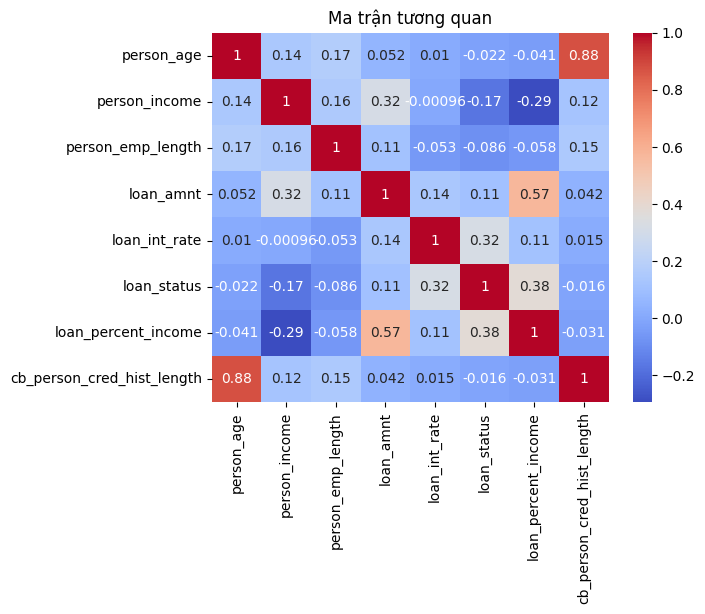

In [ ]:
# Correlation Matrix via Heatmap
sns.heatmap(data.corr(numeric_only=True),cmap='coolwarm',annot=True)
plt.title('Ma trận tương quan')
plt.show()

Based on the heatmap, we focus on analyzing the relationships between variables and loan_status (default status):
- loan_percent_income (Loan-to-income ratio): Shows a significant positive correlation with loan_status (correlation coefficient ≈ 0.38). This indicates that a higher loan-to-income ratio is associated with an increased likelihood of loan default. This is an important risk factor.
- loan_int_rate (Loan interest rate): Positively correlated with loan_status (correlation coefficient ≈ 0.32). Higher interest rates are often associated with a greater risk of default.
- loan_amnt (Loan amount): Positively correlated with loan_status (correlation coefficient ≈ 0.11). Although weaker than the previous variables, larger loan amounts tend to be associated with a higher default risk.
- person_income (Annual income): Negatively correlated with loan_status (correlation coefficient ≈ -0.17). This is reasonable, as borrowers with higher income generally have better repayment ability, thus lower default risk.
- person_emp_length (Years of employment): Negatively correlated with loan_status (correlation coefficient ≈ -0.086). Although weak, the relationship suggests that borrowers with longer work experience are less likely to default.
- person_age (Age) and cb_person_cred_hist_length (Credit history length): Both show very weak or negligible correlation with loan_status. Notably, person_age and cb_person_cred_hist_length exhibit a very strong positive correlation (≈ 0.88), indicating that older borrowers tend to have longer credit histories. However, this relationship has little direct impact on loan_status.

In summary, the variables with the most notable correlation with loan_status are loan_percent_income, loan_int_rate, and person_income. These variables are likely to be important predictors in the logistic regression model.

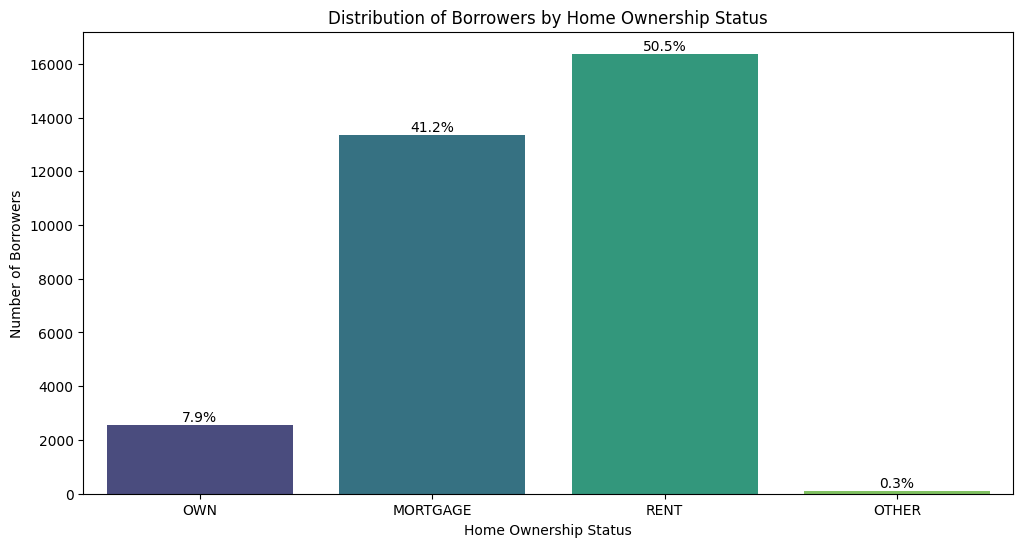

In [52]:
# Bar chart of borrowers’ home ownership status (person_home_ownership).
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=data,
    x='person_home_ownership',
    palette='viridis',
    hue='person_home_ownership',
    legend=False
)
plt.title('Distribution of Borrowers by Home Ownership Status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=0)

total = len(data['person_home_ownership'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

The chart shows that the majority of borrowers fall into the renting category (RENT), accounting for more than 50% of the dataset, followed by those who own a home with a mortgage (MORTGAGE) at 41.2%. Borrowers who fully own their homes (OWN) represent the smallest group, at only 7.9%. This suggests that over 91.7% of borrowers who are either renting or in the process of purchasing a home have a very high demand for unsecured loans.

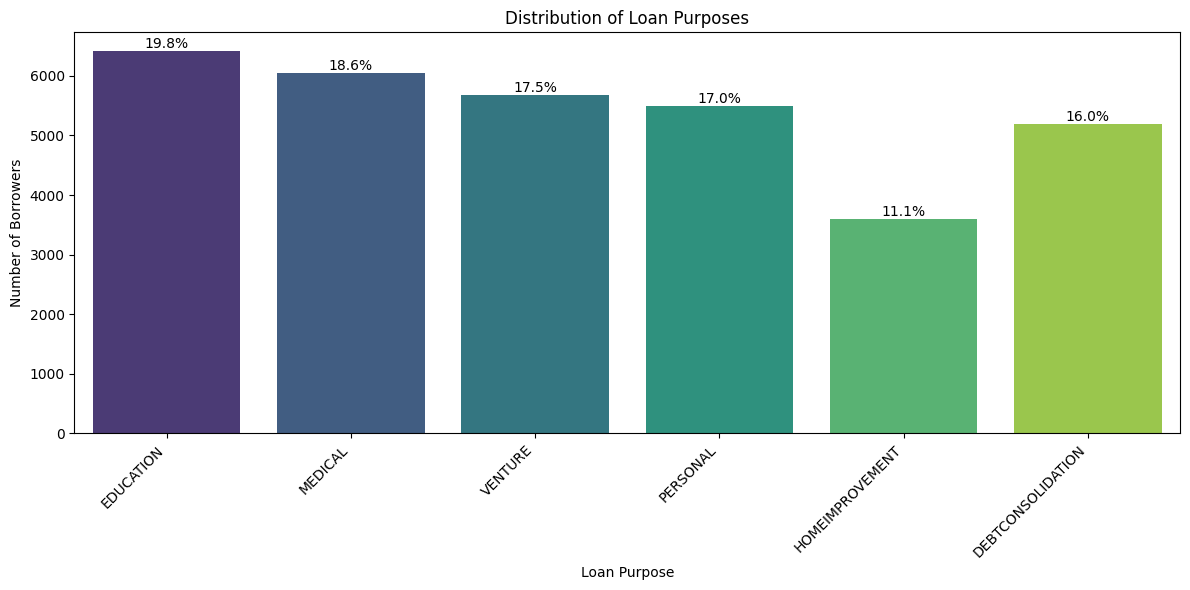

In [53]:
# Bar chart of loan purposes (loan_intent).
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=data,
    x='loan_intent',
    palette='viridis',
    hue='loan_intent',
    legend=False
)
plt.title('Distribution of Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45, ha='right')

total = len(data['loan_intent'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Regarding the loan purpose chart, the purposes are relatively common and evenly distributed in the range of 16%–19.8%. Education (EDUCATION) ranks highest at 19.8%, followed by medical expenses (MEDICAL) at 18.6%, business investment (VENTURE) at 17.5%, personal use (PERSONAL) at 17%, debt consolidation (DEBTCONSOLIDATION) at 16%, and the lowest being home improvement (HOMEIMPROVEMENT) at 11.1%. This reflects the diverse borrowing needs of individuals for various personal and business purposes.

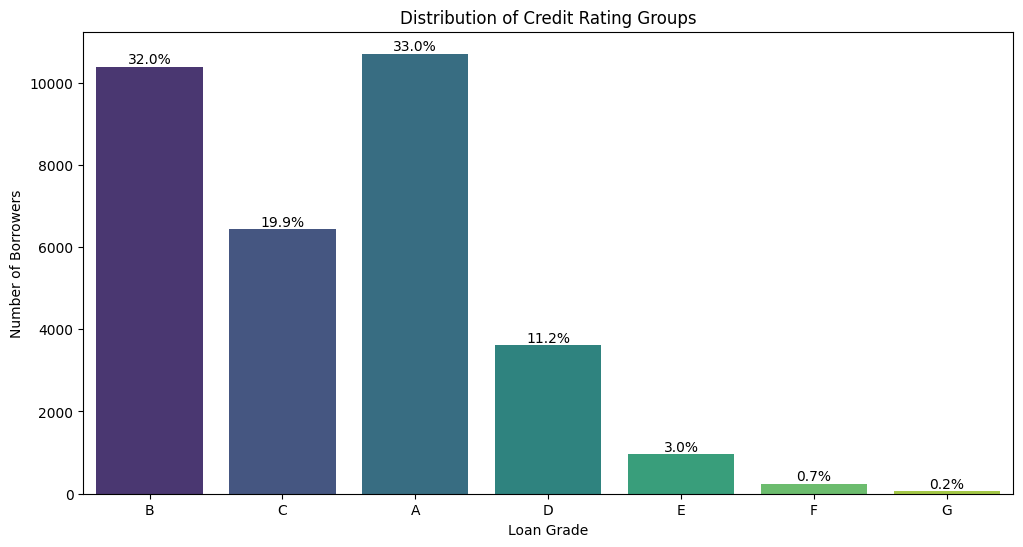

In [54]:
# Bar chart of credit rating groups (loan_grade)
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=data,
    x='loan_grade',
    palette='viridis',
    hue='loan_grade',
    legend=False
)
plt.title('Distribution of Credit Rating Groups')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=0)

total = len(data['loan_grade'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


The credit grade distribution chart indicates that the majority of loans fall within grades A, B, and C, accounting for approximately 85% of the dataset. Lower-grade loans (D, E, F, G) make up only about 15%. This suggests that most loans have at least average credit quality; however, a notable proportion of high-risk loans still exists and warrants thorough analysis.

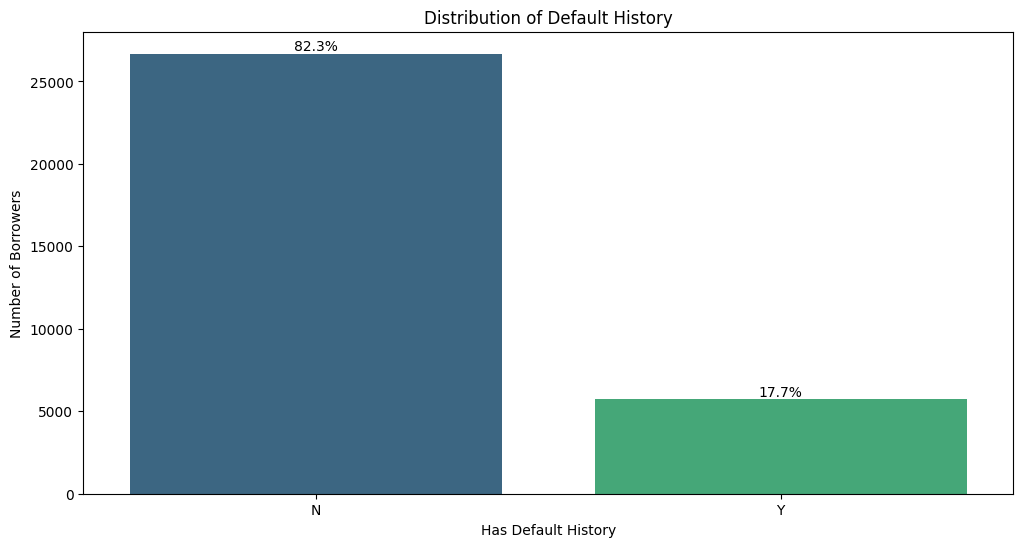

In [55]:
# Chart of the Default History Variable (cb_person_default_on_file)
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='cb_person_default_on_file', palette='viridis', hue='cb_person_default_on_file', legend=False)
plt.title('Distribution of Default History')
plt.xlabel('Has Default History')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=0)
total = len(data['cb_person_default_on_file'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()


The chart indicates that the vast majority of borrowers in the dataset have no prior default history (N), accounting for approximately 82.3%. Only a small proportion, 17.7%, have a history of default (Y). This is a positive signal regarding the overall quality of the dataset; however, the smaller group with a default history (Y) represents a critical segment that warrants closer examination in risk prediction models.

# **Chapter 4: Application of the Logistic Regression Model**

## **4.1. Objective**
The goal is to develop a Logistic Regression model to predict the probability of a customer defaulting on a loan (loan_status = 1) based on demographic, financial, and loan-related features.
This is a binary classification problem, where:
- loan_status = 1 → Customer defaults on the loan
- loan_status = 0 → Customer does not default on the loan

## **4.2. Data Preparation**
Mathematical models such as Logistic Regression cannot directly process string (categorical) data. Therefore, it is necessary to convert categorical variables into numerical form.

In [ ]:
# Categorical Variable Encoding
# Apply One-Hot Encoding with drop_first=True to avoid the dummy variable trap (multicollinearity issue)
categorical_cols = data.select_dtypes(include='object').columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,2,False,True,...,False,False,True,False,False,False,False,False,False,False


## **4.3. Data Splitting**
The encoded dataset is split into a training set and a testing set.
We use an 80%–20% split, where 80% of the data is used for training to allow the model to learn effectively, and 20% is reserved for testing to evaluate the model’s generalization capability.

In [ ]:
# The input variables (features)
X = data_encoded.drop('loan_status', axis=1)
# The target variable (loan_status)
y = data_encoded['loan_status']
# 80% training – 20% testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **4.4. Model Development and Training**

Initialize and train the Logistic Regression model using the training dataset.

In [ ]:
# The model is trained on the training set
# Logistic Regression learns to estimate the probability of default based on the input variables X
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## **4.5. Model Evaluation**
Use the test dataset to assess the model’s performance using appropriate metrics (e.g., Confusion Matrix, Classification Report).

In [ ]:
# Use the trained model to predict the labels of the test dataset X_test
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[4873  187]
 [ 948  474]]


- TN (True Negative) = 4,863: The model correctly predicted customers who did not default.
- FP (False Positive) = 197: The model incorrectly predicted default, but in reality, the customer did not default.
- FN (False Negative) = 946: The model incorrectly predicted no default, but in reality, the customer defaulted → very risky in finance.
- TP (True Positive) = 476: The model correctly predicted customers who defaulted.

Summary: The model tends to make "safe" predictions of no default, leading to a high number of missed cases where customers actually defaulted.

In [ ]:
# Compare actual values (y_test) with predicted values (y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5060
           1       0.72      0.33      0.46      1422

    accuracy                           0.82      6482
   macro avg       0.78      0.65      0.68      6482
weighted avg       0.81      0.82      0.80      6482



**Class 0 (Non-default)**:
- Precision = 0.84: Among all instances predicted as non-default, 84% were correct.
- Recall = 0.96: Among all actual non-default customers, the model correctly identified 96%.
- F1-score = 0.89: The harmonic mean of precision and recall indicates strong performance for the non-default class.
→ The model performs well in predicting non-default cases.

**Class 1 (Default)**:
- Precision = 0.71: Among all instances predicted as default, only 71% were correct.
- Recall = 0.33: Among all actual default customers, the model detected only 33%.
- F1-score = 0.45: Overall performance for the default class is relatively poor.

The recall for Class 1 is critically low, meaning the model misses a large proportion of high-risk customers. This is unacceptable in lending or risk management contexts.

While the model achieves an overall accuracy of 82%, if the dataset is imbalanced (Class 0 significantly outnumbering Class 1), this metric can be misleading and give a false sense of performance.

## **4.6. Model Results**
Interpret the model coefficients to understand the magnitude and direction of each variable’s impact on the probability of default.

In [50]:
# Hệ số của các biến ảnh hưởng đến khả năng vỡ nợ
coefficients = pd.Series(model.coef_[0], index=X_train.columns)
print("Model Coefficients:")
print(coefficients)

Model Coefficients:
person_age                    -0.127513
person_income                 -0.000037
person_emp_length             -0.035528
loan_amnt                      0.000106
loan_int_rate                  0.214714
loan_percent_income            0.003173
cb_person_cred_hist_length     0.160717
person_home_ownership_OTHER    0.000486
person_home_ownership_OWN     -0.035283
person_home_ownership_RENT     0.053369
loan_intent_EDUCATION         -0.028160
loan_intent_HOMEIMPROVEMENT    0.016391
loan_intent_MEDICAL            0.009388
loan_intent_PERSONAL          -0.010862
loan_intent_VENTURE           -0.032425
loan_grade_B                  -0.047803
loan_grade_C                  -0.028197
loan_grade_D                   0.067903
loan_grade_E                   0.019905
loan_grade_F                   0.005658
loan_grade_G                   0.002755
cb_person_default_on_file_Y    0.033061
dtype: float64


### **4.6.1. Personal Characteristics**
- person_age (coefficient = -0.128091)

→ Higher age is associated with a lower probability of default. This finding is reasonable, as it may reflect greater financial maturity and more experience in debt management among older borrowers.
- person_income (coefficient = -0.000037)

→ Higher income slightly reduces default risk, although the effect size is minimal. This weak influence may suggest the need for variable scaling or transformation.
- person_emp_length (coefficient = -0.036109)

→ Longer employment tenure is linked to a reduced likelihood of default. This is consistent with the expectation that job stability supports steady income and stronger repayment capacity.


### **4.6.2. Loan Information**
- loan_amnt (coefficient = 0.000106)

→ Larger loan amounts are associated with a slightly higher probability of default. Although the coefficient is small, this aligns with financial logic: higher borrowing generally means greater financial burden.
- loan_int_rate (coefficient = 0.216633)

→ This is the most influential variable. Higher interest rates either signal higher borrower risk or impose greater repayment pressure, both of which increase the likelihood of default.
- loan_percent_income (coefficient = 0.003187)

→ A higher loan-to-income ratio is linked to increased default risk. This metric reflects the borrower’s debt-carrying capacity.

### **4.6.3. Housing Ownership (person_home_ownership)**
Reference category (baseline): MORTGAGE — other categories (OTHER, RENT, OWN) are interpreted relative to MORTGAGE.
- OTHER (coefficient = 0.000488)

→ No meaningful impact (coefficient close to zero); can be considered negligible.
- OWN (coefficient = -0.035299)

→ Homeownership slightly reduces the risk of default, possibly due to having collateral or greater housing stability.
- RENT (coefficient = 0.053485)

→ Renters exhibit a higher risk of default, potentially due to having fewer assets for collateral and higher fixed living expenses.

### **4.6.4. Loan Purpose (loan_intent)**
Reference category (baseline): DEBTCONSOLIDATION — other categories are interpreted relative to DEBTCONSOLIDATION.
- EDUCATION (coefficient = -0.028151)

→ Education loans tend to carry lower risk, reflecting long-term investment and often well-planned repayment strategies.
- HOMEIMPROVEMENT (coefficient = 0.016398)

→ Home improvement loans slightly increase default risk, though the effect is marginal.
- MEDICAL (coefficient = 0.009404)

→ Loans for medical expenses also show a slight increase in risk, possibly reflecting the impact of unexpected costs.
- PERSONAL (coefficient = -0.010861)

→ Contrary to intuition, personal loans have a small negative coefficient, suggesting borrowers in this category may repay better than expected.
- VENTURE (coefficient = -0.032432)

→ Startup or venture investment loans appear to have lower default risk in this dataset, though caution is warranted in interpretation as the sample size for this category may be limited.

### **4.6.5. Credit Grade (loan_grade)**
Reference category (baseline): Grade A.
- B (coefficient = -0.047824), C (coefficient = -0.028148)

→ Surprisingly, grades B and C have negative coefficients, suggesting lower default risk compared to grade A. This contradicts typical credit logic and may be due to data noise or unobserved interactions.
- D (coefficient = 0.068004), E (coefficient = 0.019940), F (coefficient = 0.005667), G (coefficient = 0.002758)

→ Lower credit grades generally show positive coefficients, indicating higher risk, which aligns with expectations. Grade D, in particular, exhibits the highest risk after grade A.

### **4.6.6. Credit History and Behavior**
- cb_person_cred_hist_length (coefficient = 0.159607)

→ A longer credit history is unexpectedly associated with a higher probability of default. This contradicts conventional expectations and suggests the variable might be affected by noise, age, or interaction effects with other variables.
- cb_person_default_on_file_Y (coefficient = 0.033161)

→ Customers with a prior default history clearly exhibit a higher likelihood of default, which is entirely consistent with financial logic.

# **Chapter 5: Conclusion**

## **5.1. General Conclusion**

Through initial data analysis and visualization, we examined the distribution of demographic characteristics, financial conditions, and loan information within the dataset. Notably, the correlation matrix revealed that the loan-to-income ratio (loan_percent_income), loan interest rate (loan_int_rate), and annual income (person_income) exhibit the most significant linear relationships with default likelihood.

The Logistic Regression model provided a quantitative assessment of the influence of each variable. Coefficient analysis reinforced the correlation findings, confirming that loan_int_rate and loan_percent_income substantially increase default risk, whereas person_income and person_age tend to reduce it. Other features such as home ownership status (person_home_ownership) and credit grade (loan_grade) also demonstrated meaningful differences in risk profiles across categories.

However, the evaluation results — based on the Confusion Matrix and Classification Report — highlight a critical challenge: the current model underperforms in detecting actual default cases (Recall for class 1 is only 33%). While the overall accuracy reaches 82%, the high rate of missed bad loans (False Negatives) poses a serious risk in real-world credit management applications.

## **5.2. Contributions and Limitations**

- Contributions: The project has identified the key factors influencing default risk and developed a baseline model for prediction. The coefficient analysis offers valuable insights into the underlying drivers of loan default, which can serve as a reference for credit risk assessment and lending policy formulation.
- Limitations: The predictive performance for the default class (minority class) remains low. The imbalance between the two target classes is likely a major contributing factor. Additionally, certain coefficient results (e.g., cb_person_cred_hist_length) warrant further investigation to clarify potential data noise, feature interactions, or unexpected correlations.

## **5.3. Future Directions**

To enhance the practical applicability and the model’s ability to detect high-risk loans, future work may focus on the following areas:
1. Addressing Class Imbalance
- Implement techniques such as SMOTE (Synthetic Minority Oversampling), Random Undersampling, or hybrid approaches to improve the model’s learning capability for the minority class.
- Consider algorithms inherently robust to imbalanced data, such as XGBoost with the scale_pos_weight parameter.

2. Feature Engineering
- Create additional derived features that capture repayment capacity, credit behavior, and overall financial health.
- Perform feature selection to retain only the most predictive variables and reduce noise.

3. Exploring Alternative or Advanced Models
- Experiment with classification algorithms such as Decision Trees, Random Forests, Gradient Boosting, or LightGBM/XGBoost.
- Evaluate model performance using multiple metrics (Precision, Recall, F1-score, AUC) to select the optimal approach.

4. Adjusting the Classification Threshold
- Modify the probability cutoff to prioritize reducing False Negatives (missed defaults), even at the cost of increasing False Positives.
- Utilize Precision-Recall and ROC curves to determine the most appropriate threshold.